In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [7]:
tips=sns.load_dataset('tips') # tips 패키지 불러오기
print(tips)
print('\n')
print(tips.dtypes) # 데이터 형 확인
print('\n')
tips.info() # 데이터형 확인
print('\n')
print(tips.shape) # 데이터형 확인 
print('\n')
tips.isnull().sum() #변수별 결측치 확인
print('\n')
tips.describe() # 수치형 자료 요약통계량

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Colu

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# tips 회귀분석하기 

In [8]:
# 연속형 변수 추출
lm_df=tips[['tip','total_bill']]
lm_df.isnull().sum() # 결측값 x

tip           0
total_bill    0
dtype: int64

In [9]:
lm_df.corr() # 0.61

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


In [10]:
lm_df.shape

(244, 2)

In [11]:
linear_regression=linear_model.LinearRegression() #선형 회귀모델 생성

In [12]:
linear_regression.fit(X=pd.DataFrame(lm_df['total_bill']),y=lm_df['tip']) # 모델학습 독립변수 X는 대문자로 넣고 종속변수는 소문자로 지정

LinearRegression()

In [13]:
#생성된 모델을 통한 예측값 출력
prediction= linear_regression.predict(X=pd.DataFrame(lm_df['total_bill']))
prediction

array([2.70463616, 2.00622312, 3.12683472, 3.40725019, 3.5028225 ,
       3.57633966, 1.84133463, 3.74332864, 2.49983836, 2.47253198,
       1.99887141, 4.6234341 , 2.53974767, 2.85587147, 2.47778321,
       3.1866987 , 2.00517288, 2.631119  , 2.70253567, 3.0890259 ,
       2.80230897, 3.05121707, 2.57650625, 5.06033609, 3.00185555,
       2.79075627, 2.32444741, 2.25303074, 3.19930164, 2.98400138,
       1.92325375, 2.84746951, 2.50193885, 3.09322688, 2.78760553,
       3.4471595 , 2.63321949, 2.69833469, 2.88317784, 4.20438627,
       2.60486287, 2.75399769, 2.38431139, 1.93690694, 4.11301494,
       2.84116804, 3.25496464, 4.32306398, 3.91871958, 2.81491191,
       2.23727706, 2.0009719 , 4.57617306, 1.96421332, 3.60469628,
       2.96719746, 4.91225152, 3.69396712, 2.10074519, 5.98980307,
       3.05121707, 2.3706582 , 2.0776398 , 2.84116804, 2.76765087,
       3.02916192, 2.64792292, 1.24269488, 3.0449156 , 2.49668762,
       2.18266431, 2.71303813, 3.74122815, 3.57528941, 2.46728

In [14]:
linear_regression.intercept_ # 절편

0.9202696135546731

In [15]:
linear_regression.coef_ # 계수 회귀식  y= 0.92 + 0.105*tip

array([0.10502452])

In [16]:
residuals=lm_df['tip']-prediction  # 잔차 - 실제값 - 예측값
residuals

0     -1.694636
1     -0.346223
2      0.373165
3     -0.097250
4      0.107178
         ...   
239    1.950869
240   -1.774836
241   -1.301175
242   -1.041807
243    0.107370
Name: tip, Length: 244, dtype: float64

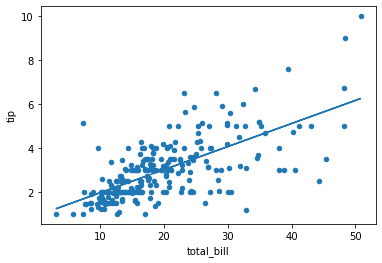

In [17]:
lm_df.plot(kind='scatter',x='total_bill',y='tip')
plt.plot(lm_df['total_bill'],prediction)
plt.show() #양의 상관관계를 보임

In [18]:
mse=(residuals**2).mean() 
print(mse)
rmse=np.sqrt(mse)
print(rmse)

1.0360194420113769
1.0178504025697377


# 모델의 설명력이 0.46 정도로 조금 약하다고 볼 수 있음

In [19]:
from sklearn.metrics import mean_squared_error
print('score=',linear_regression.score(X=pd.DataFrame(lm_df['total_bill']),y=lm_df['tip'])) 

score= 0.45661658635167657


In [20]:
print('MSE=',mean_squared_error(prediction,lm_df['tip']))

MSE= 1.036019442011377


In [21]:
print('RMSE=',mean_squared_error(prediction,lm_df['tip'])**0.5)

RMSE= 1.0178504025697377


# 검정값이 6.35e-09 확률이 0.000, 5%유의수준에서 봤을 때 유의확률이 많이 적으므로 귀무가설을 기각 대립가설 채택
# 회귀모형이 유의하며 식사대금이 팁에 유의한 영향을 끼친다

In [22]:
import statsmodels.api as sm
lmd=sm.OLS(lm_df['tip'],sm.add_constant(lm_df['total_bill'])).fit()
lmd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Fri, 07 Jan 2022   Prob (F-statistic):           6.69e-34
Time:                        08:15:02   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

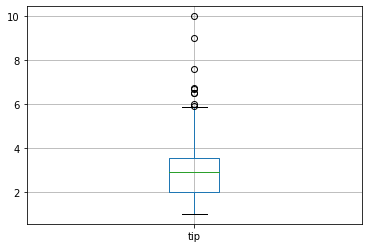

In [23]:
tips.boxplot(column=['tip'])
plt.show() #boxplot 시각화 범주+ 연속

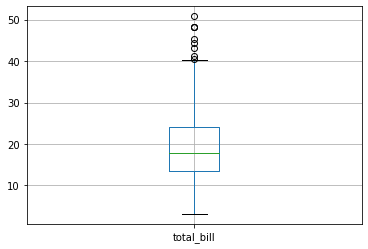

In [24]:
tips.boxplot(column=['total_bill'])
plt.show() #boxplot 시각화 범주+ 연속

In [25]:
tips=sns.load_dataset('tips') # tips 패키지 불러오기
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [26]:
# 연속형 변수 추출
lm_df=tips[['tip','total_bill']]
lm_df.isnull().sum() # 결측값 x

tip           0
total_bill    0
dtype: int64

In [27]:
lm_df=lm_df[lm_df['tip']<=5.9] # 3.5625+(1.5*(3.5625-2))
lm_df=lm_df[lm_df['total_bill']<=40.5] # 24.1275+(1.5*(24.1275-13.1475))

In [28]:
lm_df.shape

(229, 2)

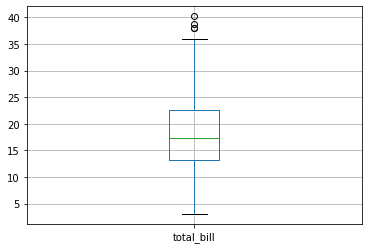

In [29]:
lm_df.boxplot(column=['total_bill'])
plt.show() #boxplot 시각화 범주+ 연속

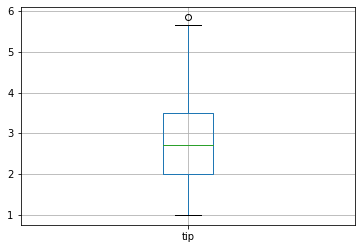

In [30]:
lm_df.boxplot(column=['tip'])
plt.show() #boxplot 시각화 범주+ 연속

In [31]:
linear_regression=linear_model.LinearRegression() #선형 회귀모델 생성

In [32]:
linear_regression.fit(X=pd.DataFrame(lm_df['total_bill']),y=lm_df['tip']) # 모델학습 독립변수 X는 대문자로 넣고 종속변수는 소문자로 지정

LinearRegression()

In [33]:
#생성된 모델을 통한 예측값 출력
prediction= linear_regression.predict(X=pd.DataFrame(lm_df['total_bill']))
prediction

array([2.67177077, 2.06994286, 3.03558253, 3.2772187 , 3.3595741 ,
       3.4229244 , 1.92785717, 3.5668201 , 2.49529491, 2.4717648 ,
       2.06360783, 4.32521377, 2.52968508, 2.8020914 , 2.47628982,
       3.08716778, 2.06903785, 2.60842046, 2.66996076, 3.00300237,
       2.75593618, 2.97042221, 2.56136023, 2.92788701, 2.74598113,
       2.34415918, 2.28261889, 3.09802783, 2.91250193, 1.99844751,
       2.79485136, 2.49710492, 3.00662239, 2.74326611, 3.31160886,
       2.61023047, 2.66634074, 2.82562151, 3.96411702, 2.58579535,
       2.71430597, 2.39574443, 2.01021257, 3.88538164, 2.78942134,
       3.14599306, 3.71795583, 2.76679623, 2.26904382, 2.06541784,
       4.28448857, 2.03374268, 3.44735952, 2.89802186, 4.57408997,
       3.52428489, 2.15139325, 2.97042221, 2.38397938, 2.13148315,
       2.78942134, 2.72607103, 2.95141712, 2.62290053, 1.41200467,
       2.96499219, 2.4925799 , 2.22198359, 2.6790108 , 3.56501009,
       3.4220194 , 2.46723978, 2.08532793, 2.75593618, 3.59578

In [34]:
linear_regression.intercept_ # 절편

1.1341683309306456

In [35]:
linear_regression.coef_ # 절편

array([0.09050044])

In [136]:
residuals=lm_df['tip']-prediction  # 잔차 - 실제값 - 예측값
residuals

0     -1.661187
1     -0.369212
2      0.440732
3     -0.007024
4      0.205127
         ...   
238    0.180045
240   -1.654905
241   -1.219521
242   -1.001313
243    0.156011
Name: tip, Length: 224, dtype: float64

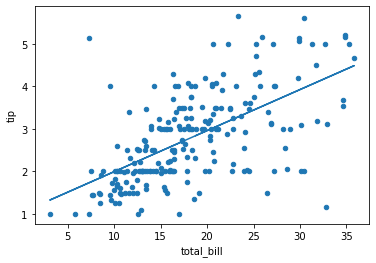

In [137]:
lm_df.plot(kind='scatter',x='total_bill',y='tip')
plt.plot(lm_df['total_bill'],prediction)
plt.show() #양의 상관관계를 보임

In [ ]:
mse=(residuals**2).mean() 
print(mse)
rmse=np.sqrt(mse)
print(rmse)

# 결정계수 0.37으로 이상치 제거이전보다 더 약한 설명력을 가진다

In [139]:
from sklearn.metrics import mean_squared_error
print('score=',linear_regression.score(X=pd.DataFrame(lm_df['total_bill']),y=lm_df['tip'])) 

score= 0.37233817431228355


In [107]:
import statsmodels.api as sm
lmd=sm.OLS(lm_df['tip'],sm.add_constant(lm_df['total_bill'])).fit()
lmd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     131.7
Date:                Thu, 06 Jan 2022   Prob (F-statistic):           3.07e-24
Time:                        14:37:32   Log-Likelihood:                -279.69
No. Observations:                 224   AIC:                             563.4
Df Residuals:                     222   BIC:                             570.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0310      0.162      6.351      0.000       0.711       1.351
total_bill     0.0965      0.008     11.476      0.000       0.080       0.113
==============================================================================
Omnibus:                       10.924   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               18.983
Skew:                           0.236   Prob(JB):                     7.55e-05
Kurtosis:                       4.346   Cond. No.                         55.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
ddd=np.quantile(tips.total_bill,0.75)-np.quantile(tips.total_bill,0.25)
np.quantile(tips.total_bill,0.75)+(1.5*ddd)

40.29749999999999

In [122]:
ddd=np.quantile(tips.tip,0.75)-np.quantile(tips.tip,0.25)
np.quantile(tips.tip,0.75)+(1.5*ddd)

5.906249999999998

In [142]:
new_tips=tips.loc[(tips.total_bill<=40)&(tips.tip<=5.9)]

In [143]:
linear_regression.fit(X=pd.DataFrame(new_tips['total_bill']),y=new_tips['tip']) # 모델학습 독립변수 X는 대문자로 넣고 종속변수는 소문자로 지정

LinearRegression()

In [147]:
#생성된 모델을 통한 예측값 출력
prediction= linear_regression.predict(X=pd.DataFrame(new_tips['total_bill']))
prediction

array([2.67183897, 2.06950763, 3.03595506, 3.27779335, 3.36021764,
       3.42362094, 1.92730308, 3.56763701, 2.49521549, 2.47166569,
       2.0631673 , 4.32666507, 2.52963443, 2.80226861, 2.4761945 ,
       3.08758346, 2.06860186, 2.60843567, 2.67002744, 3.00334765,
       2.75607478, 2.97074023, 2.56133607, 2.92816945, 2.7461114 ,
       2.34395333, 2.28236156, 3.09845259, 2.9127715 , 1.99795247,
       2.79502252, 2.49702701, 3.00697069, 2.74339412, 3.31221229,
       2.61024719, 2.6664044 , 2.82581841, 3.96526627, 2.58579163,
       2.71440975, 2.39558174, 2.00972737, 3.88646502, 2.78958795,
       3.14645795, 3.71889916, 2.76694392, 2.26877514, 2.06497882,
       4.28590581, 2.03327717, 3.4480765 , 2.89827932, 4.57574946,
       3.52506622, 2.15102615, 2.97074023, 2.38380684, 2.1310994 ,
       2.78958795, 2.72618465, 2.95171924, 2.62292785, 1.41101908,
       2.96530567, 2.49249821, 2.22167554, 2.67908506, 3.56582548,
       3.42271518, 2.46713689, 2.08490557, 2.75607478, 3.59662

In [148]:
residuals=new_tips['tip']-prediction  # 잔차 - 실제값 - 예측값
residuals

0     -1.661839
1     -0.409508
2      0.464045
3      0.032207
4      0.249782
         ...   
238    0.291707
240   -1.594810
241   -1.186311
242   -0.997017
243    0.166030
Name: tip, Length: 228, dtype: float64

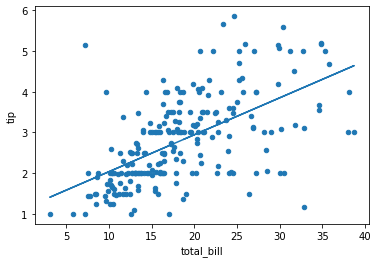

In [150]:
new_tips.plot(kind='scatter',x='total_bill',y='tip')
plt.plot(new_tips['total_bill'],prediction)
plt.show() #양의 상관관계를 보임

In [152]:
mse=(residuals**2).mean() 
print(mse)
rmse=np.sqrt(mse)
print(rmse)

0.7516080154828293
0.8669532948682007


In [153]:
print('score=',linear_regression.score(X=pd.DataFrame(lm_df['total_bill']),y=lm_df['tip'])) 

score= 0.3708877044282215


In [157]:
ne=new_tips[['tip','total_bill']]
ne.corr() # 0.59  이상치 제거 이전보다 상관계수가 줄어듦.

,tip,total_bill
tip,1.000000,0.594011
total_bill,0.594011,1.000000
